In [1]:
import csv

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
txt_file = 'DC06_l_45_2'+ ".txt"
E_Modul = 206000

p_r = 0.3  # Poisson's ratio

with open(txt_file, "rb") as fp:
    a = [x.rstrip() for x in fp]
    for item in a:
        if item.startswith(b"Specimen thickness"):
            l1 = item.split()
            print(l1)
            thickness = float(l1[2])
            print(f"thickness: {thickness} mm")

        if item.startswith(b"Marked initial gage length"):
            l2 = item.split()
            print(l2)
            gage_length = float(l2[4])
            print(f"gage_length: {gage_length} mm")

        if item.startswith(b"Specimen width"):
            l3 = item.split()
            print(l3)
            Specimen_width = float(l3[2])
            print(f"Specimen_width: {Specimen_width} mm")

[b'Specimen', b'thickness', b'1.495', b'mm']
thickness: 1.495 mm
[b'Marked', b'initial', b'gage', b'length', b'80', b'mm']
gage_length: 80.0 mm
[b'Specimen', b'width', b'19.867', b'mm']
Specimen_width: 19.867 mm


In [3]:
data = pd.read_csv(txt_file, sep=";", header=6, encoding="latin-1", index_col=False)
# column_headers = list(data.columns.values)
# print(column_headers)

data.columns = ["Standard_force", "Standard_travel", "Test_time", "Transverse_strain"]
# print(column_headers[0])


print("reading file:", txt_file)

Standard_force = np.array(data.Standard_force)
Standard_travel = np.array(data.Standard_travel)
Transverse_strain = np.array(data.Transverse_strain)


transverse_true_strain = np.log(1 - np.divide(Transverse_strain,(Specimen_width)))

print("transverse_true_strain: ", transverse_true_strain)

eng_strain = np.divide(Standard_travel, gage_length)


eng_stress = np.divide(Standard_force, (thickness * Specimen_width))


true_stress = eng_stress * (1 + eng_strain)


true_strain = np.log(1 + eng_strain)


longitudinal = true_strain - np.divide(eng_stress, E_Modul)


transverse = transverse_true_strain + p_r * np.subtract(true_strain , longitudinal)

print(true_stress[1])

list_pw = []
list_pw.append(0)
print("\nlist_pw[0] = ", list_pw)
pw = 0
for i in range(1, len(transverse) - 1):
    pw = (
        list_pw[i - 1]
        + np.multiply(
            (true_stress[i] + true_stress[i + 1]), (longitudinal[i + 1] - longitudinal[i])
        )*0.5
        
    )
    list_pw.append(pw)
print("\nlist_pw[2]:", list_pw[1000])
pw_end = 0
pw_end2 = 0

list_pw.append(pw_end)
# list_pw.append(pw_end2)


print("!!!!!!!!!!!!!!!echo\n")

print("\nlen list_pw: ", len(list_pw))

# i=1
# pw = (
#     (true_stress[i + 1] + true_stress[i + 2])
#     * (longitudinal[i + 2] - longitudinal[i + 1])
#     / 2
# )

# print("pw: ",pw)

print("\ntransverse: ", transverse[800])

r_value = (transverse / (-longitudinal- transverse))
print("\nr_value = ", r_value)

initial_length = data["Standard_travel"][0]
end_length = data["Standard_travel"].last_valid_index()
# print(end_length/ initial_length)

length_strain = np.log(end_length / initial_length)
print("length_strain = ", length_strain)


reading file: DC06_l_45_2.txt
transverse_true_strain:  [-1.20004007e-12 -1.20004007e-12 -1.20004007e-12 ... -7.19060162e-01
 -7.19060162e-01 -7.19060162e-01]
0.36163247339695176

list_pw[0] =  [0]

list_pw[2]: 2.2134504946147597
!!!!!!!!!!!!!!!echo


len list_pw:  35213

transverse:  -0.007360182041095149

r_value =  [ 0.42857026  0.42857007  0.42857015 ... -2.11479321 -2.11491722
 -2.11508108]
length_strain =  36.117542928134604


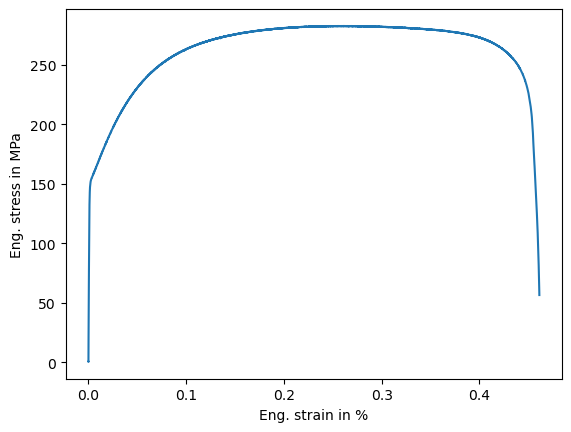

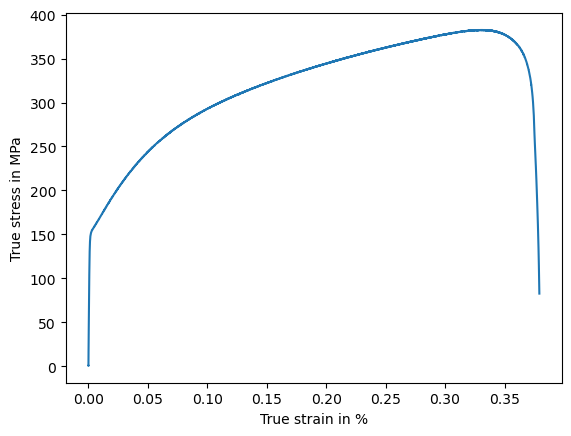

In [4]:
plt.plot(eng_strain, eng_stress,)
# plt.plot(true_strain,true_stress)
# plt.plot(eng_strain[tp],eng_stress[tp],'ro')


plt.xlabel("Eng. strain in %")
plt.ylabel("Eng. stress in MPa")

plt.show()


plt.plot(true_strain, true_stress)


plt.xlabel("True strain in %")
plt.ylabel("True stress in MPa")

plt.show()

In [5]:
# make a new data frame for the new data
df2 = pd.DataFrame(
    {"Stress": eng_stress, "Strain": eng_strain}
)  # here you name the column and add the variable string
# Get a series containing maximum value of each column
maxValuesObj = df2.max()
print("Maximum value in each column : ")
print(maxValuesObj)
df3 = df2[(df2["Stress"] >= 147) & (df2["Stress"] <= 200)]
df3 = df3[0 : int(0.5 * len(df3))]

Maximum value in each column : 
Stress    282.664003
Strain      0.461295
dtype: float64


In [6]:
# import statsmodels.formula.api as smf #this is the library to use for plot fitting
# # Initialise and fit linear regression model using `statsmodels`
# model = smf.ols('Stress ~ Strain', data=df3)
# model = model.fit()
# model.params

x = np.array(df3["Strain"]).reshape(-1, 1)

y = np.array(df3["Stress"])

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x_ = PolynomialFeatures(degree=1, include_bias=False).fit_transform(x)
model = LinearRegression().fit(x_, y)
r_sq = model.score(x_, y)

y_pred = model.predict(x_)

r_sq

print(model.intercept_)
print(model.coef_)


147.71422819228215
[2057.92130321]


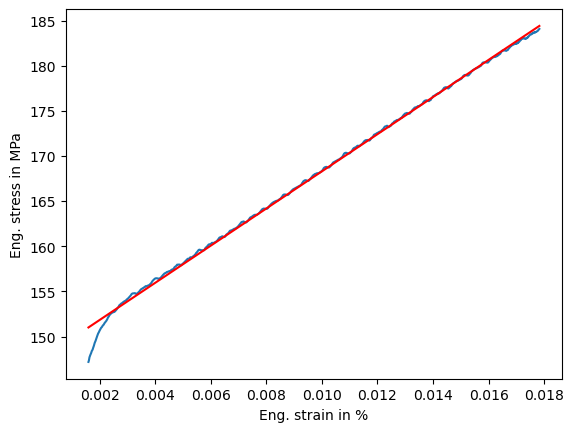

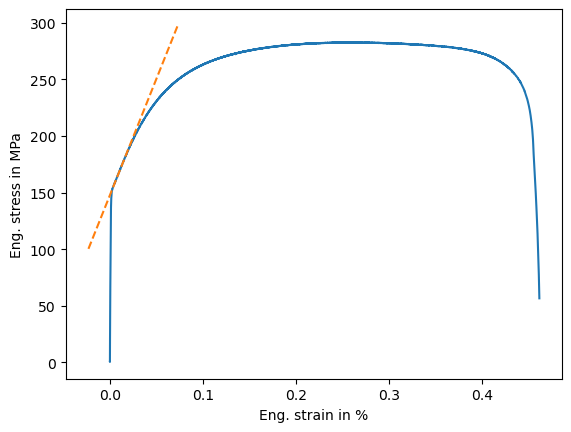

In [7]:
# fit = (df3['Strain']*model.Strain()) + model.Intercept() #This is the y =mx + b function for the fit
strainL = df3["Strain"]  # this makes my x variable
stressL = df3["Stress"]  # this makes my y varaible
plt.plot(strainL, stressL)  # Plotting the original data
plt.plot(x, y_pred, "r", label="fitted line")
plt.xlabel("Eng. strain in %")
plt.ylabel("Eng. stress in MPa")
plt.show()


def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    a, b = (axes.get_xlim())
    
    x_vals = np.linspace(a,0.15*b,10)
    
    y_vals = intercept + slope * x_vals
    
    plt.plot(x_vals, y_vals, '--')

plt.plot(df2["Strain"], df2["Stress"])  # Plotting the original data
# plt.plot(x, y_pred, "r", label="fitted line")
abline(model.coef_, model.intercept_)

plt.xlabel("Eng. strain in %")
plt.ylabel("Eng. stress in MPa")
plt.show()


# model.summary()

In [8]:
# list_pw = [0]*len(list_transverse)
# print(list_pw)

# df_pw = pd.DataFrame({
#         "true_stress": list_true_stress,
#         "longitudinal": list_longitudinal,
#         "plasticwork": list_pw,
# })

# for i in range(1,len(list_pw)-1):
#     list_pw[i]= (list_true_stress[i+1] + list_true_stress[i+2])*(list_longitudinal[i+2]-list_longitudinal[i+1])/2

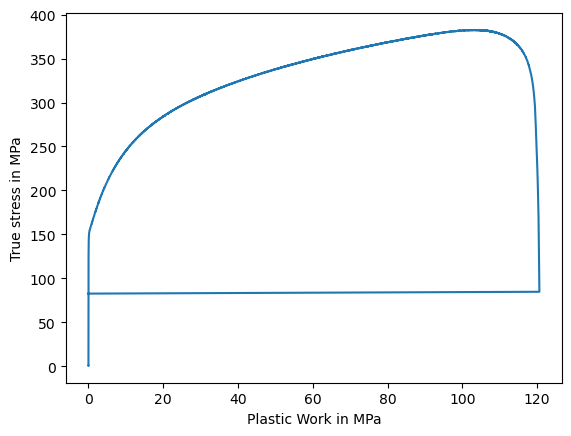

In [9]:
plt.plot(list_pw,true_stress,"-")
plt.xlabel("Plastic Work in MPa")
plt.ylabel("True stress in MPa")


plt.show()


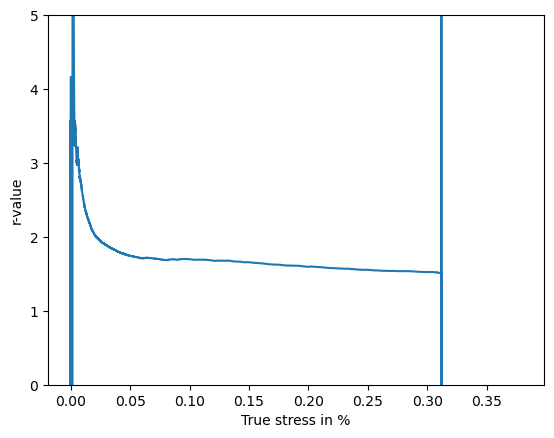

In [10]:
plt.plot(true_strain,r_value)
plt.xlabel("True stress in %")
plt.ylabel("r-value")
plt.ylim([0, 5])
plt.show()


In [11]:
df_Model = pd.DataFrame(
    {
        "Standard_force": data.Standard_force,
        "Standard_travel": data.Standard_travel,
        "Transverse_strain": data.Transverse_strain,
        "transverse_true_strain": transverse_true_strain,
        "true_strain": true_strain,
        "true_stress": true_stress,
        "eng_strain": eng_strain,
        "eng_stress": eng_stress,
        "longitudinal": longitudinal,
        "transverse": transverse,
        "plastic_work": list_pw,
        "r_value": r_value,
    }
)
df_Model.head()

,Standard_force,Standard_travel,Transverse_strain,transverse_true_strain,true_strain,true_stress,eng_strain,eng_stress,longitudinal,transverse,plastic_work,r_value
0,12.531056,7.261747e-12,2.384226e-11,-1.200040e-12,9.081624e-14,0.421905,9.077183e-14,0.421905,-0.000002,6.144229e-07,0.000000e+00,0.42857
1,10.740906,7.261747e-12,2.384226e-11,-1.200040e-12,9.081624e-14,0.361632,9.077183e-14,0.361632,-0.000002,5.266480e-07,-4.373377e-08,0.42857
2,11.456966,7.261747e-12,2.384226e-11,-1.200040e-12,9.081624e-14,0.385741,9.077183e-14,0.385741,-0.000002,5.617580e-07,0.000000e+00,0.42857
3,10.740906,7.261747e-12,2.384226e-11,-1.200040e-12,9.081624e-14,0.361632,9.077183e-14,0.361632,-0.000002,5.266480e-07,-2.151420e-08,0.42857
4,11.098936,7.261747e-12,2.384226e-11,-1.200040e-12,9.081624e-14,0.373687,9.077183e-14,0.373687,-0.000002,5.442030e-07,6.031028e-08,0.42857


In [12]:
df_Model.to_csv("./test.csv")